In [1]:
%matplotlib inline

# Assignment 2

**DUE: Sunday October 23 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [2]:
NAME = "Devan O'Boyle"
STUDENT_ID = "1829932"

## Problem 1 - Yield Dataset with Polynomial Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

This dataset of size $n = 15$ contains measurements of yield from an experiment done at five different temperature levels. The variables are $y = yield$ and $x = temperature$ in degrees Fahrenheit. Download the data from PyDrive.

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
downloaded = drive.CreateFile({'id':"1Oikuudc0715xr2QezMpKTNAD4_SdMfH3"})
downloaded.GetContentFile('yield.csv')  

In [7]:
# Create pandas dataframe
data = pd.read_csv('yield.csv')

In [8]:
# Let's look at the data
data

,50,3.3
0,50,2.8
1,50,2.9
2,70,2.3
3,70,2.6
4,70,2.1
5,80,2.5
6,80,2.9
7,80,2.4
8,90,3.0
9,90,3.1


In [9]:
# Look at data description
data.describe()

,50,3.3
count,14.000000,14.00000
mean,80.000000,2.80000
std,16.641006,0.38829
min,50.000000,2.10000
25%,70.000000,2.52500
50%,80.000000,2.85000
75%,90.000000,3.00000
max,100.000000,3.50000


In [10]:
# Split data in X and y using pandas functionality.
X = data.iloc[:,0] # Create vector of explanatory variables
y = data.iloc[:,1] # Create vector of target variables

# Cast dataframes into numpy arrays
X = X.values
y = y.values

# Split data into X_train, Y_train, X_test y_test using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Reshape X_train, X_test for sklearn LinearRegression
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

### a) Linear Regression (10 points)

We will run a simple linear regression on this well-curated dataset using sklearn's **LinearRegression**.

Hint: Review the sklearn docs https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html and class exercise.

In [11]:
from sklearn.linear_model import LinearRegression
# Instantiate LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_train and y_train
regressor.fit(X_train, y_train)

LinearRegression()

Let's now visually inspect the model and see how well this model predicts the yield. 
* First, plot the yield vs. temperature points from training set in black.
* Then, plot the regression line in red. Predictions from the regression model lie along the red line.

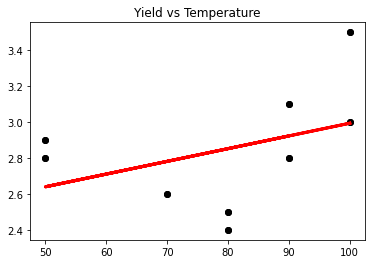

In [12]:
# Plot the actual yield (y_train) vs. temperature values from training set

plt.scatter(X_train, y_train, color='black')

# Plot the regression line
y_pred = regressor.predict(X_train)

plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, y_pred, color='red', linewidth=3)
plt.title('Yield vs Temperature')
plt.show()

Let's also visually inspect the prediction results from the test set.
* First, plot the yield vs. temperature points from the test set in black
* Then plot the regression line in red to see how prediction is similar to or different from the actual target.

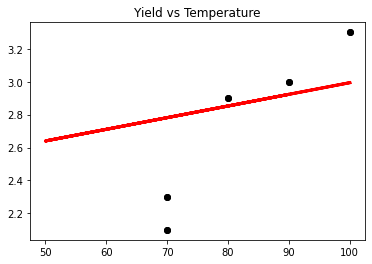

In [13]:
# Plot the actual yield (y_test) vs. temperature values  for the test set

plt.scatter(X_test, y_test, color='black')

# Plot the regression line
y_pred = regressor.predict(X_train)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_train, y_pred, color='red', linewidth=3)
plt.title('Yield vs Temperature')
plt.show()

### b) Inspecting Linear Regression Model (5 points)

After inspecting the results visually, does this model appear to be a good or bad fit on the test set and training set? 

It's a bad fit for both the test set and the training set as the model appears to be undertrained as the linear regression lines don't accurately represent the patterns from either the training or the test sets.

Does the model display signs of underfitting? If so, why?

Yes, because the lines generated by the linear regression don't accurately match the patterns generated by the scatterplot. For instance, in the test data, a parabola can be formed from the scatterplot, but the line fails to capture that pattern and therefore the model is underfit.

### c) Polynomial Regression (10 points)

Data may not follow a linear relationship from the independent variable $X$ to the dependent variable $y$. Fitting a linear model to this would be inaccurate and yield a high loss. 

If we want to model an order $d$ polynomial relationship between $X$ and $y$ we can augment our initial linear model where instead of having:
$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)}
$$

We have:

$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)} + \theta_2 {x^{(i)}}^2 + \cdots + \theta_d {x^{(i)}}^d
$$

We can use the same linear regression algorithm we if we first augment $X$ and add extra columns (or dimensions). 

$$ \textbf X =
\begin{bmatrix}
    x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots       & \vdots & \ddots & \vdots \\
    x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}$$

Then our new higher order $\hat Y$ is computed same as before.

$$ \hat Y =  X \theta =
\begin{bmatrix}
    1 & x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    1 & x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_{d} 
\end{bmatrix}=
\begin{bmatrix}
    \theta_0 + \theta_1 x^{(1)} + \theta_2 {x^{(1)}}^2 + \cdots + \theta_{d}  {x^{(1)}}^d \\
    \theta_0 + \theta_1 x^{(2)} + \theta_2 {x^{(2)}}^2 + \cdots + \theta_{d}  {x^{(2)}}^d  \\
    \vdots   \\
    \theta_0 + \theta_1 x^{(n)} + \theta_2 {x^{(n)}}^2 + \cdots + \theta_{d}  {x^{(n)}}^d
\end{bmatrix} 
= \begin{bmatrix}\hat y^{(1)} \\ \hat y^{(2)} \\ \vdots \\ \hat y^{(n)} 
\end{bmatrix}$$

Using sklearn's **PolynomialFeatures** functionality, we will now transform X_train and X_test into second order polynomial space.

For more info: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [14]:
# First, lets look at the values of X_train
print(X_train)

[[100]
 [ 90]
 [ 50]
 [ 80]
 [ 90]
 [ 70]
 [ 50]
 [ 80]
 [100]]


In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Creates polynomial transform of degree 2
poly = PolynomialFeatures(2)

# Transform X_train X_test
X_train_sort = np.sort(X_train, axis=0)
X_train_pol = poly.fit_transform(X_train_sort)
X_test_pol = poly.fit_transform(X_test)

# Print X_train_pol
print(X_train_pol)

[[1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 1.0e+02 1.0e+04]
 [1.0e+00 1.0e+02 1.0e+04]]


We can now fit a second degree polynomial regression model to the transformed data.

In [16]:
from sklearn.linear_model import LinearRegression
# Instantiate LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_train_pol and y_train
regressor.fit(X_train_pol, y_train)


LinearRegression()

Now, visually inspect the polynomial regression model and see how well this model predicts the yield on the training set. 

Plot the yield vs. temperature points in black along with the polynomial regression line in red. Hint: For plotting the regression line, you can use the plot function to interpolate the regression line based on the model's prediction on data points.

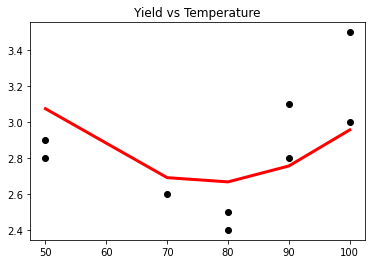

In [17]:
# Plot the actual yield (y_train) vs temp. values from training set
plt.scatter(X_train, y_train, color='black')

# Plot the regression line
y_pred = regressor.predict(X_train_pol)

plt.plot(X_train_sort, y_pred, color='red', linewidth=3)
plt.title('Yield vs Temperature')
plt.show()

Lastly, let's plot the test set yield vs. temperature points along with the polynomial regression line.

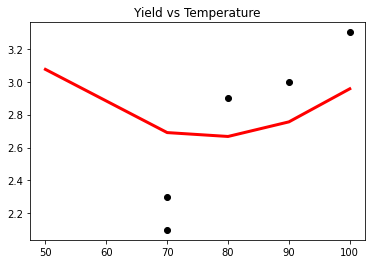

In [18]:
# Plot the actual yield (y_test) vs temp. values from test set

plt.scatter(X_test, y_test, color='black')

# Plot the regression line
y_pred = regressor.predict(X_train_pol)

plt.plot(X_train_sort, y_pred, color='red', linewidth=3)
plt.title('Yield vs Temperature')
plt.show()

### d) Inpsecting Polynomial Regression Model (5 points)

After inspecting the polynomial regression model, does the model appear to be a better fit than simple linear regression? 

Yes, the model fits better than linear as the curve matches the pattern of the points better.

Does the model address display more or less underfitting than the simple linear regression model and why?

It displays less underfitting because it predicts the pattern more accurately by capturing the parabola pattern that was present in test scatterplot.

## Problem 2 - Fish Dataset

## Importing the Dataset

We will now perform different variations of linear regression to predict fish weight given species type, weight, and physical measurements. The different attributes of the data are:

- Species: species name of fish

- Weight: weight of fish in Gram (g)

- Length1: vertical length in (cm)

- Length2: diagonal length in (cm)

- Length3: cross length in (cm)

- Height: height in (cm)

- Width: diagonal width in (cm)

Begin by downloading the Fish.csv file from google drive. Make sure to select your @ucsc.edu email when authorizing access to your account. 

In [19]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [20]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [21]:
# Download the Fish data
downloaded = drive.CreateFile({'id':"13Q2WAaDIP6D5yrQlLV3OMnkmcwxcAwHz"})
downloaded.GetContentFile('Fish.csv')  

In [22]:
import pandas as pd

# Create pandas dataframe
fish_data = pd.read_csv('Fish.csv')

Let's look at some of the data and check some of the dataset descriptors.

In [23]:
# Let's print out the first few rows
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [24]:
# Let's get the data shape
fish_data.shape

(159, 7)

In [25]:
# Let's describe the data
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [26]:
# Lastly, let's get data info
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### a) Removing 0's from data (5 points)

We can see that there aren't any null values in this dataset by using the .info() function. However, .describe() shows us there are weights of 0.0g which is ambiguous and is likely a recording error. 

Drop any row that has a weight of 0.0.

In [27]:
# Delete any rows for which there is a measurement of 0.0 for weight.
index = fish_data[ (fish_data['Weight'] == 0.0) ].index
fish_data.drop(index , inplace=True)

# Let's take another look.
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### b) Outlier Detection \& Elimination (5 points)

Using 4 standard deviations from the mean as our cut-off, and using the data listed using the describe function above, are there any outliers?

In [28]:
### YOUR CODE HERE ###
fish_data['WeightZ'] = [(x - fish_data['Weight'].mean())/fish_data['Weight'].std() for x in fish_data['Weight']]
i = fish_data[ (fish_data['WeightZ'] > 4) | (fish_data['WeightZ'] < -4) ].index
fish_data = fish_data.drop(i)
fish_data = fish_data.drop(['WeightZ'], axis=1)

fish_data['Length1Z'] = [(x - fish_data['Length1'].mean())/fish_data['Length1'].std() for x in fish_data['Length1']]
i = fish_data[ (fish_data['Length1Z'] > 4) | (fish_data['Length1Z'] < -4) ].index
fish_data = fish_data.drop(i)
fish_data = fish_data.drop(['Length1Z'], axis=1)

fish_data['Length2Z'] = [(x - fish_data['Length2'].mean())/fish_data['Length2'].std() for x in fish_data['Length2']]
i = fish_data[ (fish_data['Length2Z'] > 4) | (fish_data['Length2Z'] < -4) ].index
fish_data = fish_data.drop(i)
fish_data = fish_data.drop(['Length2Z'], axis=1)

fish_data['Length3Z'] = [(x - fish_data['Length3'].mean())/fish_data['Length3'].std() for x in fish_data['Length3']]
i = fish_data[ (fish_data['Length3Z'] > 4) | (fish_data['Length3'] < -4) ].index
fish_data = fish_data.drop(i)
fish_data = fish_data.drop(['Length3Z'], axis=1)

fish_data['HeightZ'] = [(x - fish_data['Height'].mean())/fish_data['Height'].std() for x in fish_data['Height']]
i = fish_data[ (fish_data['HeightZ'] > 4) | (fish_data['HeightZ'] < -4) ].index
fish_data = fish_data.drop(i)
fish_data = fish_data.drop(['HeightZ'], axis=1)

fish_data['WidthZ'] = [(x - fish_data['Width'].mean())/fish_data['Width'].std() for x in fish_data['Width']]
i = fish_data[ (fish_data['WidthZ'] > 4) | (fish_data['WidthZ'] < -4) ].index
fish_data = fish_data.drop(i)
fish_data = fish_data.drop(['WidthZ'], axis=1)

fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


No, there are no outliers that span more than 4 standard deviations from the mean.

## Problem 3 - Fish Linear Regression

You will now run different versions of linear regression in order to predict fish Weight using the 6 explanatory variables.

### a) Multiple Linear Regression (6 points)

First, run a multiple linear regression using only the height, width, and length measurements to predict weight. We will begin by splitting the data into features **X_fish** and target variable **y_fish**.

In [29]:
y_fish = fish_data.iloc[:, 1] # Get Fish Weights
X_fish = fish_data.drop(columns=['Weight']) # Get Fish measurements plus species
X_fish = X_fish.drop(columns=['Species']) # Drop the Fish Species for now

# Print X.head(), you should have 5 features for each sample
print("X_fish.head():")
print(X_fish.head())

# Print y.head(), you should have one label for each sample
print("\ny_fish.head()")
print(y_fish.head())

X_fish.head():
   Length1  Length2  Length3   Height   Width
0     23.2     25.4     30.0  11.5200  4.0200
1     24.0     26.3     31.2  12.4800  4.3056
2     23.9     26.5     31.1  12.3778  4.6961
3     26.3     29.0     33.5  12.7300  4.4555
4     26.5     29.0     34.0  12.4440  5.1340

y_fish.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Now, we are almost ready to run regression with scikit-learn. We need to first convert **X_fish** and **y_fish** into numpy arrays and split the data into training and validation splits using sklearn **train_test_split**. 

sklearn's train_test_split offers customizable functionality when creating training and test sets. For more information, checkout https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html .

In [30]:
# Convert X, and y into np arrays
X_fish = X_fish.values
y_fish = y_fish.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train, X_fish_test, y_fish_train, y_fish_test = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 0)

Now we are ready to run a multiple linear regression. Use sklearn's **LinearRegression** to carry out the regression.

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_fish_train and y_fish_train
regressor.fit(X_fish_train, y_fish_train)


LinearRegression()

Now let's see how we did and generate predictions for X_fish_test. Then print predicted values and actual target values side-by-side for a visual comparison.

In [32]:
# Generate predictions using X_fish_test
y_fish_pred = regressor.predict(X_fish_test)

# Print the predictions along with actual weights
for i in range(len(y_fish_pred)):
    print(str(y_fish_pred[i]) + " " + str(y_fish_test[i]))

476.5911788231239 390.0
207.9929561343153 160.0
696.6127779796425 700.0
829.8356241968233 1015.0
155.66081610908924 120.0
839.4307731235601 1100.0
756.4245421886376 820.0
860.9053846020513 950.0
648.0651893666604 556.0
194.3693561652255 145.0
656.3311559338006 700.0
988.3533044034291 1600.0
694.4190899537582 720.0
27.97315647136844 55.0
90.4049206066108 85.0
279.88428527811055 188.0
426.5171449059047 300.0
253.2749712393798 180.0
988.3533044034291 1550.0
380.413825535969 306.0
203.77329399786692 140.0
873.1342266822826 975.0
776.42866651791 1000.0
514.645291232129 450.0
156.25494339977575 110.0
98.82407554183447 78.0
423.3405775079619 300.0
638.7605513223941 650.0
-203.30791321585656 6.7
611.8753010365667 514.0
352.8777398627022 290.0
307.75783507086004 270.0


### b) Computing MSE and R-squared for MLR (5 points)

The model appears to do an okay job predicting some weights while missing the mark on others. Let's quantify the results by computing mean squared error (MSE) and the coefficient of determination (R-squared). sklearn's metrics package provides functions to compute the values for you. 

More info can be found here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pred
print(f'Mean squared error: {mean_squared_error(y_fish_test, y_fish_pred):.2f}')

# Compute the coefficient of determination using y_fish_test and y_fish_pred
print(f'Coefficient of determination: {r2_score(y_fish_test, y_fish_pred):.2f}')


Mean squared error: 31561.77
Coefficient of determination: 0.82


Using the y_fish_test and y_fish_pred, what was the mean squared error for this model?

31561.77

Using the y_fish_test and y_fish_pred, what was the coefficient of detemination for this model?

0.82

### c) Polynomial Multiple Linear Regression (12 points)

We have seen how polynomial regression can increase the predictive power of linear regression models. We will now run a polynomial multiple linear regression model in order to gain a more accurate model. Begin by transforming the features X_fish_test and X_fish_train into second order polynomial space. There will be interaction terms in the transformed dataset as well. For more on interaction terms visit the sklearn docs.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial transform of degree 2. hint: problem 1
poly = PolynomialFeatures(2)

# Transform X_fish_train X_fish_test to second order polynomial space
X_fish_train_pol = poly.fit_transform(X_fish_train)
X_fish_test_pol = poly.fit_transform(X_fish_test)

# Print 5 rows of X_fish_train_poly, shape should be (5,21)
for i in range(5):
    print(X_fish_train_pol[i])

[1.00000000e+00 3.04000000e+01 3.30000000e+01 3.83000000e+01
 1.48604000e+01 5.28540000e+00 9.24160000e+02 1.00320000e+03
 1.16432000e+03 4.51756160e+02 1.60676160e+02 1.08900000e+03
 1.26390000e+03 4.90393200e+02 1.74418200e+02 1.46689000e+03
 5.69153320e+02 2.02430820e+02 2.20831488e+02 7.85431582e+01
 2.79354532e+01]
[1.00000000e+00 3.48000000e+01 3.73000000e+01 3.98000000e+01
 6.28840000e+00 4.01980000e+00 1.21104000e+03 1.29804000e+03
 1.38504000e+03 2.18836320e+02 1.39889040e+02 1.39129000e+03
 1.48454000e+03 2.34557320e+02 1.49938540e+02 1.58404000e+03
 2.50278320e+02 1.59988040e+02 3.95439746e+01 2.52781103e+01
 1.61587920e+01]
[1.0000000e+00 4.0000000e+01 4.2500000e+01 4.5500000e+01 6.8250000e+00
 4.4590000e+00 1.6000000e+03 1.7000000e+03 1.8200000e+03 2.7300000e+02
 1.7836000e+02 1.8062500e+03 1.9337500e+03 2.9006250e+02 1.8950750e+02
 2.0702500e+03 3.1053750e+02 2.0288450e+02 4.6580625e+01 3.0432675e+01
 1.9882681e+01]
[1.00000000e+00 3.15000000e+01 3.45000000e+01 3.97000000

Next run the second order polynomial regression using the transformed data. Instantiate a new regression model and use X_fish_train_pol and y_fish_train to fit the model.

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_fish_train_pol and y_fish_train
regressor.fit(X_fish_train_pol, y_fish_train)


LinearRegression()

Now let's see how we did with the second model and generate predictions using X_fish_test_pol. Then print predicted values and actual target values side-by-side for a visual comparison.

In [36]:
# generate predictions using X_test
y_fish_pol_pred = regressor.predict(X_fish_test_pol) 

# Print the predictions along with actual weights
for i in range(len(y_fish_pred)):
    print(str(y_fish_pol_pred[i]) + " " + str(y_fish_test[i]))

410.7816173430182 390.0
144.99000843059122 160.0
661.0899461816323 700.0
916.2093863540233 1015.0
120.28326145948392 120.0
892.2945253778635 1100.0
779.3303627505404 820.0
970.513720576776 950.0
613.9718885345345 556.0
138.7568509471924 145.0
702.9669446833437 700.0
1200.8808098546658 1600.0
736.0196461334201 720.0
68.24127115649014 55.0
65.4187035093226 85.0
204.06717258294225 188.0
348.32997005295204 300.0
164.86007087658982 180.0
1200.8808098546658 1550.0
301.2936467564483 306.0
132.03878287235457 140.0
1080.9518492396282 975.0
800.5548871861488 1000.0
465.06392927910895 450.0
113.12282845044044 110.0
78.16667223767863 78.0
337.9263526033892 300.0
610.8883810801682 650.0
14.314256689567003 6.7
526.2784399152637 514.0
265.75936168111843 290.0
235.08321339093163 270.0


### d) Computing MSE and R-squared for Polynomial Regression (5 points)

Now, compute the MSE and R-squared using y_fish_test and y_fish_pol_pred

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pol_pred
print(f'Mean squared error: {mean_squared_error(y_fish_test, y_fish_pol_pred):.2f}')

# Compute the coefficient of determination using y_fish_test and y_fish_pol_pred
print(f'Coefficient of determination: {r2_score(y_fish_test, y_fish_pol_pred):.2f}')


Mean squared error: 12552.65
Coefficient of determination: 0.93


Using the y_fish_test and y_fish_pol_pred, what was the mean squared error for this model?

12552.65

Using the y_fish_test and y_fish_pol_pred, what was the coefficient of detemination for this model?

0.93

### e) Multiple Linear Regression With Categorical Variable (12 points)

Now that we have done multiple linear regression, and polynomial multiple linear regression, we will now do a multiple linear regression that takes into account the species of fish by creating numeric levels.

In [38]:
# Create a copy of fish_data
fish_data_species = fish_data

# Begin by generating a dictionary that maps all unique species in fish_data to a unique id
level_dict = dict.fromkeys(fish_data['Species'])
i = 0
for x in level_dict:
    level_dict[x] = i
    i += 1

# Uses the level dictionary to retrieve the id
def integer_encode_level(level):
    return level_dict[level]

# Apply the function to the Species column and store in Species column (you should overwrite the species current data with the numeric representations)
fish_data_species['Species'] = [integer_encode_level(x) for x in fish_data['Species']]

# Use the numeric Species column you just created to one-hot-encode this feature, using the Pandas get_dummies function. Then delete the numeric Species column.
fish_data_species = pd.concat([fish_data_species, pd.get_dummies(fish_data_species['Species'], prefix='Species')],axis=1)
fish_data_species.drop(['Species'], axis=1, inplace=True)

# Check data
fish_data_species

,Weight,Length1,Length2,Length3,Height,Width,Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,0,1
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,0,1
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,0,1
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,0,1


We will now create a dataset with 1 target column and 12 feature columns: 

Length1, Length2, Length3, Height, Width, Spec_0, Spec_1, Spec_2, Spec_3, Spec_4, Spec_5, Spec_6.

In [39]:
# Split fish_data into 
y_fish_categorical = fish_data_species.iloc[:, 0] # Get Fish Weights
X_fish_categorical = fish_data_species.drop(columns=['Weight']) # Get Fish measurements plus species

# Print X_fish_categorical.head(), you should have 6 features for each sample
print("X_fish_categorical.head():")
print(X_fish_categorical.head())

# Print y_fish_categorical.head(), you should have one label for each sample
print("\ny_fish_categorical.head()")
print(y_fish_categorical.head())

X_fish_categorical.head():
   Length1  Length2  Length3   Height   Width  Species_0  Species_1  \
0     23.2     25.4     30.0  11.5200  4.0200          1          0   
1     24.0     26.3     31.2  12.4800  4.3056          1          0   
2     23.9     26.5     31.1  12.3778  4.6961          1          0   
3     26.3     29.0     33.5  12.7300  4.4555          1          0   
4     26.5     29.0     34.0  12.4440  5.1340          1          0   

   Species_2  Species_3  Species_4  Species_5  Species_6  
0          0          0          0          0          0  
1          0          0          0          0          0  
2          0          0          0          0          0  
3          0          0          0          0          0  
4          0          0          0          0          0  

y_fish_categorical.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Create training and test sets for the fish data with categorical species variable:

In [40]:
# Convert X, and y into np arrays
X_fish_categorical = X_fish_categorical.values
y_fish_categorical = y_fish_categorical.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train_categorical, X_fish_test_categorical, y_fish_train_categorical, y_fish_test_categorical = train_test_split(X_fish_categorical, y_fish_categorical, test_size = 0.2, random_state = 0)

Now we are ready to run a our final multiple linear regression. As a recap, we added a categorical variable to represent the species of fish. We encoded the species as levels, and overwrote the species column with the numeric representations of the species. Now, use sklearn's **LinearRegression** to carry out regression one last time.

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_fish_train_categorical and y_fish_train_categorical
regressor.fit(X_fish_train_categorical, y_fish_train_categorical)


LinearRegression()

Let's check the predictions for this model and generate predictions using X_fish_test_categorical. Then print target and estimated weight values side-by-side.

In [42]:
# generate predictions using X_fish_test_categorical
y_fish_pred_categorical = regressor.predict(X_fish_test_categorical)

# Print the predictions along with actual weights
for i in range(len(y_fish_pred_categorical)):
    print(str(y_fish_pred_categorical[i]) + " " + str(y_fish_test_categorical[i]))

446.17903555215116 390.0
201.32153430171604 160.0
719.0109145946158 700.0
895.7044696026119 1015.0
76.68973366621651 120.0
913.3259681647874 1100.0
825.0297089432038 820.0
880.9764344491873 950.0
661.2397003315284 556.0
183.84246337440527 145.0
704.9891462597006 700.0
1092.2898924751362 1600.0
728.5335093496587 720.0
-89.63394121533872 55.0
51.90975235600433 85.0
262.30549461867406 188.0
369.73698834704237 300.0
237.22909697239254 180.0
1092.2898924751362 1550.0
380.39239230110456 306.0
128.73284193934717 140.0
937.735841315078 975.0
792.0131932899485 1000.0
481.4630641999024 450.0
103.25655095540412 110.0
7.263812380809668 78.0
393.21935141199765 300.0
607.0017267964859 650.0
-69.157675110946 6.7
578.5206968704604 514.0
342.05134066898177 290.0
312.6176696054562 270.0


### f) Computing MSE and R-squared for MLR with Categorical Variable (5 points)

In [43]:
# Compute the mean squared error using y_fish_test_categorical and y_fish_pred_categorical
print(f'Mean squared error: {mean_squared_error(y_fish_test_categorical, y_fish_pred_categorical):.2f}')

# Compute the coefficient of determination using y_fish_test_categorical and y_fish_pred_categorical
print(f'Coefficient of determination: {r2_score( y_fish_test_categorical, y_fish_pred_categorical):.2f}')


Mean squared error: 20560.05
Coefficient of determination: 0.89


Using y_fish_test_categorical and y_fish_pred_categorical, what was the mean squared error for this model?

20560.05

Using y_fish_test_categorical and y_fish_pred_categorical, what was the coefficient of detemination for this model?

0.89

### g) Researching for the Best Model (15 points)

Read [this](https://www.datarobot.com/blog/regularized-linear-regression-with-scikit-learn/) tutorial to see how you can control the degree of the polynomial and train a **Regularized** linear regression model.

In the cell below, investigate and show your observations on:
1. Which features are important?
2. What polynomial order is appropriate for the model to have an appropriate fit (no overfitting or underfitting)?
3. The impact of regularization (L2 norm or L1 norm) and the regularizer factor/parameter on model's generalization capability.
4. Finally, report your best model (including model's cost function, regularizer, regularizer factor, and polynomial order) along with a plot of model's performance on the training data and test data. We expect this model to perform better than all prior models you trained.

"\n# Transform X_train X_test\nX_fish_train_sort = np.sort(X_fish_train_categorical, axis=0)\nX_fish_train_pol_categorical = poly.fit_transform(X_train_sort)\nX_fish_test_pol_categorical = poly.fit_transform(X_fish_test_categorical)\n\n# Print X_train_pol\nprint(X_fish_train_pol_categorical)\n\n# Instantiate LinearRegression\nregressor = LinearRegression()\n\n# Fit the regressor using X_train_pol and y_train\nregressor.fit(X_fish_train_pol_categorical, y_fish_train_categorical)\n\n# Plot the actual yield (y_train) vs temp. values from training set\nplt.scatter(X_fish_train_categorical, y_fish_train_categorical, color='black')\n\n# Plot the regression line\ny_fish_pred = regressor.predict(X_fish_train_pol_categorical)\n\nplt.plot(X_fish_train_sort, y_fish_pred, color='red', linewidth=3)\nplt.title('Yield vs Temperature')\nplt.show()\n"

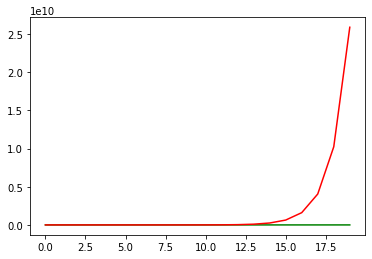

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

y_fish = fish_data.iloc[:, 1]
X_fish = fish_data[['Weight']]
X_fish = X_fish.values
y_fish = y_fish.values
X_fish_train, X_fish_test, y_fish_train, y_fish_test = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 0)

degree = 5
poly = PolynomialFeatures(degree)

train_error = np.empty(20)
test_error = np.empty(20)

for i in range(20):
    est = make_pipeline(PolynomialFeatures(i), LinearRegression())
    est.fit(X_fish_train, y_fish_train)
    train_error[i] = mean_squared_error(y_fish_train, est.predict(X_fish_train))
    test_error[i] = mean_squared_error(y_fish_test, est.predict(X_fish_test))

plt.plot(np.arange(20), train_error, color='green', label='train')
plt.plot(np.arange(20), test_error, color='red', label='test')
plt.show
'''
# Transform X_train X_test
X_fish_train_sort = np.sort(X_fish_train_categorical, axis=0)
X_fish_train_pol_categorical = poly.fit_transform(X_train_sort)
X_fish_test_pol_categorical = poly.fit_transform(X_fish_test_categorical)

# Print X_train_pol
print(X_fish_train_pol_categorical)

# Instantiate LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_train_pol and y_train
regressor.fit(X_fish_train_pol_categorical, y_fish_train_categorical)

# Plot the actual yield (y_train) vs temp. values from training set
plt.scatter(X_fish_train_categorical, y_fish_train_categorical, color='black')

# Plot the regression line
y_fish_pred = regressor.predict(X_fish_train_pol_categorical)

plt.plot(X_fish_train_sort, y_fish_pred, color='red', linewidth=3)
plt.title('Yield vs Temperature')
plt.show()
'''

The most important features are width, height, and weight as they all contain drastically different values for each species. A polynomial order of 5 serves as the most approprate fit because for polynomial values less than 5 there is underfitting and for values greater than 5 there is more overfitting as greater error results in the test data.